# Linear Regression
This program runs linear regression to attempt to predict stock prices for the next three months.

### 1. Imports

In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
sns.set()

### 2. Load the data

In [33]:
data = pd.read_csv('stocks_data.csv')
data.describe(include='all')

,Unnamed: 0,Ticker,Year,Month,MA Ratio,Result,ROE,Insider Ownership Growth,Institutional Ownership Growth,Forecast EPS Growth,Avg 2Q EPS Growth,Avg 2Q EPS Surprise,YoY EPS Growth,Sector Performance,Market Performance
count,14854.000000,14854,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000
unique,NaN,393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AWK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7426.500000,NaN,2020.669113,6.223240,1.004148,1.032817,39.494365,0.015486,0.026708,0.057775,0.181477,13.755183,0.369529,1.488003,1.438443
std,4288.124784,NaN,1.428016,3.520757,0.046473,0.149260,181.839873,0.269863,0.230675,2.136724,2.111809,46.751483,3.637998,8.164589,7.038394
min,0.000000,NaN,2018.000000,1.000000,0.580721,0.259712,-613.743387,-0.633527,-0.714136,-0.992366,-45.050000,-65.625000,-0.961538,-44.900728,-22.795349
25%,3713.250000,NaN,2019.000000,3.000000,0.977766,0.944153,10.160854,-0.001350,-0.023114,-0.184264,-0.040838,2.015000,0.017606,-3.453784,-3.160007
50%,7426.500000,NaN,2021.000000,6.000000,1.005360,1.028547,19.251991,0.000000,-0.000648,-0.039062,0.045662,6.055000,0.130688,1.496227,2.069271
75%,11139.750000,NaN,2022.000000,9.000000,1.031953,1.113949,31.949569,0.008000,0.033653,0.086957,0.154182,13.135000,0.275148,6.429508,5.507430


### 3. Clean the data

#### 3.1. Remove outliers

In [34]:
for column in ['ROE', 'Insider Ownership Growth', 'Institutional Ownership Growth', 'Forecast EPS Growth', 'Avg 2Q EPS Growth', 'YoY EPS Growth']:
    upper_bound = data[column].quantile(0.999)
    data = data[(data[column] <= upper_bound)]
q = data['Avg 2Q EPS Growth'].quantile(0.001)
data = data[(data['Avg 2Q EPS Growth'] >= q)]
data.describe(include='all')

,Unnamed: 0,Ticker,Year,Month,MA Ratio,Result,ROE,Insider Ownership Growth,Institutional Ownership Growth,Forecast EPS Growth,Avg 2Q EPS Growth,Avg 2Q EPS Surprise,YoY EPS Growth,Sector Performance,Market Performance
count,14757.000000,14757,14757.000000,14757.000000,14757.000000,14757.000000,14757.000000,14757.000000,14757.000000,14757.000000,14757.000000,14757.000000,14757.000000,14757.000000,14757.000000
unique,NaN,391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,IQV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7431.564546,NaN,2020.665447,6.222877,1.004135,1.032886,35.930619,0.009596,0.021883,0.011317,0.145736,13.522146,0.272787,1.486683,1.441679
std,4285.343004,NaN,1.428264,3.521282,0.046414,0.149125,99.720733,0.072866,0.133643,0.519399,0.806091,45.365794,1.069267,8.159292,7.043774
min,0.000000,NaN,2018.000000,1.000000,0.580721,0.259712,-613.743387,-0.633527,-0.714136,-0.992366,-3.489011,-65.625000,-0.961538,-44.900728,-22.795349
25%,3726.000000,NaN,2019.000000,3.000000,0.977791,0.944257,10.176162,-0.001361,-0.023167,-0.182927,-0.040646,1.995000,0.018152,-3.453784,-3.160007
50%,7430.000000,NaN,2021.000000,6.000000,1.005388,1.028536,19.293997,0.000000,-0.000699,-0.038835,0.045532,6.010000,0.130396,1.496227,2.069271
75%,11144.000000,NaN,2022.000000,9.000000,1.031914,1.113877,31.949569,0.007968,0.033287,0.086705,0.152364,13.080000,0.274611,6.429508,5.507430


#### 3.2. Drop unnecessary columns

In [35]:
data = data.drop(['Ticker', 'Year', 'Month', data.columns[0]], axis=1)
data_cleaned = data.reset_index(drop=True)
data_cleaned.head()

,MA Ratio,Result,ROE,Insider Ownership Growth,Institutional Ownership Growth,Forecast EPS Growth,Avg 2Q EPS Growth,Avg 2Q EPS Surprise,YoY EPS Growth,Sector Performance,Market Performance
0,0.961995,1.223647,6.913148,0.100796,-0.004951,-0.098765,0.119862,8.440,0.177215,-3.656652,-8.854201
1,1.066554,1.034318,6.913148,0.095491,0.023857,-0.098765,0.119862,8.440,0.177215,-4.861458,-3.160007
2,1.046990,0.826977,6.913148,-0.012048,0.025465,-0.052632,0.073613,7.045,0.156000,7.205480,12.969931
3,1.020680,0.915522,22.637014,0.000000,0.117718,-0.052632,0.073613,7.045,0.156000,1.791749,5.414237
4,0.983734,0.897937,22.637014,0.007317,0.121825,-0.052632,0.073613,7.045,0.156000,-2.805357,5.507430


### 4. Initial data analysis

#### 4.1. Relationship visualisation

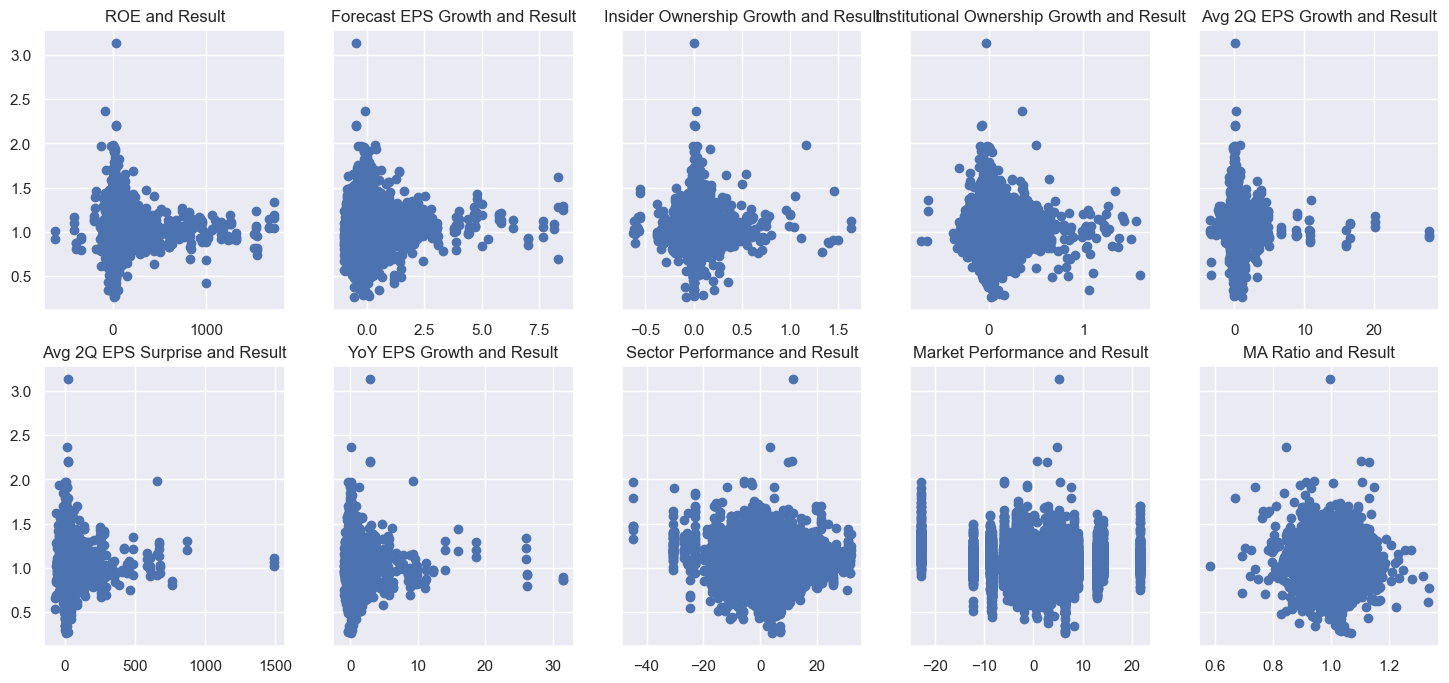

In [36]:
f, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, sharey=True, figsize=(18, 8))
ax1.scatter(data_cleaned['ROE'], data_cleaned['Result'])
ax1.set_title('ROE and Result')
ax2.scatter(data_cleaned['Forecast EPS Growth'], data_cleaned['Result'])
ax2.set_title('Forecast EPS Growth and Result')
ax3.scatter(data_cleaned['Insider Ownership Growth'], data_cleaned['Result'])
ax3.set_title('Insider Ownership Growth and Result')
ax4.scatter(data_cleaned['Institutional Ownership Growth'], data_cleaned['Result'])
ax4.set_title('Institutional Ownership Growth and Result')
ax5.scatter(data_cleaned['Avg 2Q EPS Growth'], data_cleaned['Result'])
ax5.set_title('Avg 2Q EPS Growth and Result')
ax6.scatter(data_cleaned['Avg 2Q EPS Surprise'], data_cleaned['Result'])
ax6.set_title('Avg 2Q EPS Surprise and Result')
ax7.scatter(data_cleaned['YoY EPS Growth'], data_cleaned['Result'])
ax7.set_title('YoY EPS Growth and Result')
ax8.scatter(data_cleaned['Sector Performance'], data_cleaned['Result'])
ax8.set_title('Sector Performance and Result')
ax9.scatter(data_cleaned['Market Performance'], data_cleaned['Result'])
ax9.set_title('Market Performance and Result')
ax10.scatter(data_cleaned['MA Ratio'], data_cleaned['Result'])
ax10.set_title('MA Ratio and Result')
plt.show()

The initial data visualization reveals that the relationships between the variables are not linear. Therefore, it is expected that linear regression will yield suboptimal results. Nevertheless, it is worth attempting this approach to evaluate its performance.

#### 4.2. Calculate VIFs

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['MA Ratio', 'ROE', 'Insider Ownership Growth',
       'Institutional Ownership Growth', 'Forecast EPS Growth',
       'Avg 2Q EPS Growth', 'Avg 2Q EPS Surprise', 'YoY EPS Growth',
       'Sector Performance', 'Market Performance']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,1.394312,MA Ratio
1,1.133692,ROE
2,1.032188,Insider Ownership Growth
3,1.042948,Institutional Ownership Growth
4,1.012371,Forecast EPS Growth
5,1.055163,Avg 2Q EPS Growth
6,1.112127,Avg 2Q EPS Surprise
7,1.083211,YoY EPS Growth
8,3.126897,Sector Performance
9,3.156463,Market Performance


VIF levels are acceptable

### 5. Train the model

#### 5.1. Define target and inputs, stadarise inputs

In [38]:
targets = data_cleaned['Result']
inputs = data_cleaned.drop(['Result'], axis=1)

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

#### 5.2. Split the data for training and tests

In [39]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

#### 5.3. Train the model

In [40]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### 6. Evaluation

#### 6.1. MSE and R-square

In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

Mean squared error: 0.022122425982208326
R2 score: 0.011769208338819115


#### 6.2. Model accuracy visualisation

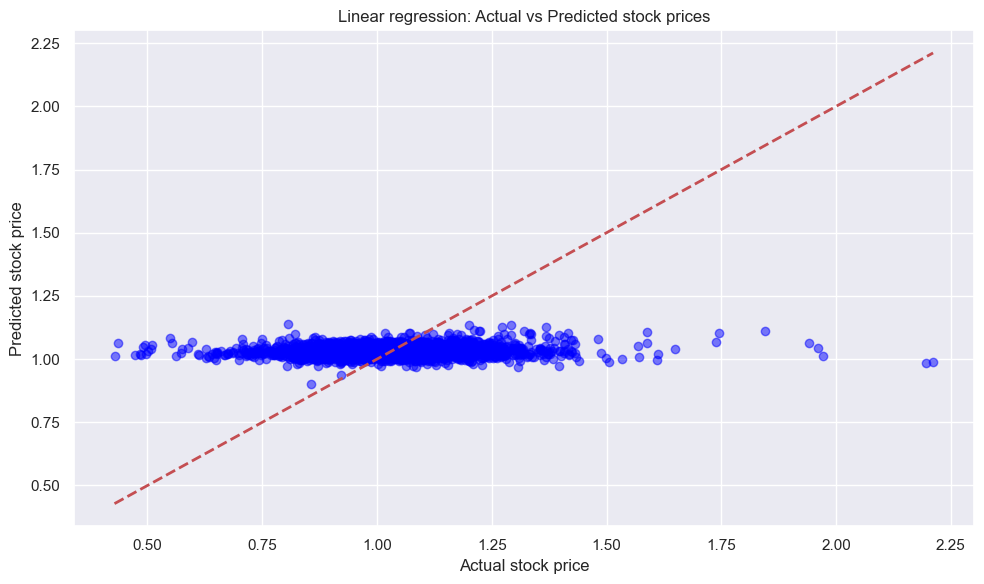

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual stock price')
plt.ylabel('Predicted stock price')
plt.title('Linear regression: Actual vs Predicted stock prices')
plt.tight_layout()
plt.show()

### 7. Conclusions

The linear regression model used to predict stock prices resulted in the following metrics:
- Mean Squared Error (MSE): 0.0221
- R² Score: 0.0118

These results indicate that the model performed poorly in explaining the variance of the stock prices, as evidenced by the near-zero R² score. Additionally, the data visualization clearly showed a lack of linear relationships between the predictors and the target variable. This confirms that linear regression is not suitable for this problem, as expected from the initial analysis. However, this attempt still provides a baseline for comparison with more complex models that may better capture the underlying patterns in the data.